In [16]:
pip install tabulate


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn import metrics

In [37]:
df = pd.read_csv("testcpns.csv")
df.head(9)

,toefl,ipk,pengalaman_kerja,diterima
0,780,4.00,3,1
1,750,3.09,4,1
2,690,3.03,3,0
3,710,3.07,5,1
4,680,3.09,4,0
5,730,3.07,6,1
6,690,2.03,1,0
7,720,3.03,4,1
8,740,3.03,5,1


In [38]:
df.describe()

,toefl,ipk,pengalaman_kerja,diterima
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,2.694500,3.425000,0.475000
std,61.427464,0.653899,1.737778,0.505736
min,540.000000,1.070000,1.000000,0.000000
25%,607.500000,2.070000,2.000000,0.000000
50%,660.000000,3.030000,4.000000,0.000000
75%,690.000000,3.070000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [39]:
print(df.dtypes)

toefl                 int64
ipk                 float64
pengalaman_kerja      int64
diterima              int64
dtype: object


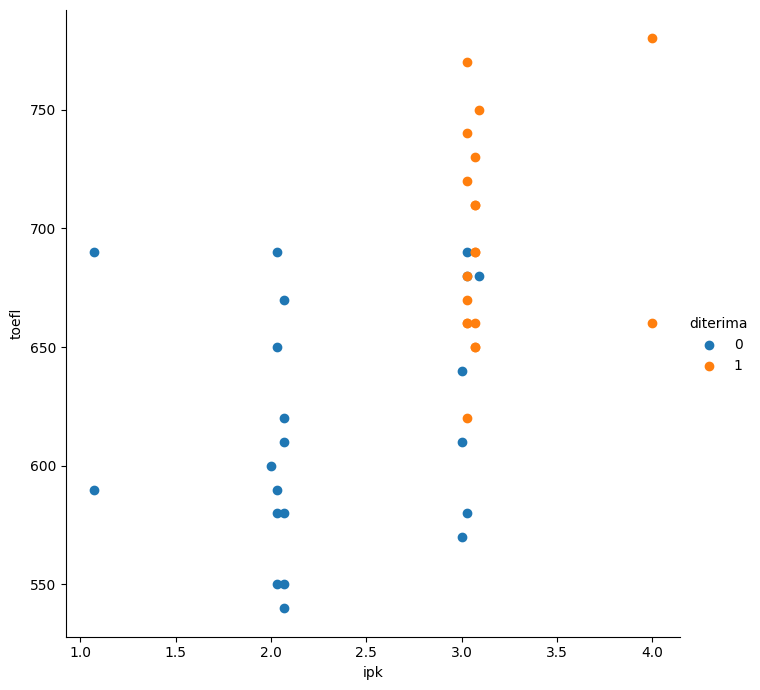

In [40]:
sns.FacetGrid(df, hue="diterima", height=7) \
   .map(plt.scatter, "ipk", "toefl") \
   .add_legend()

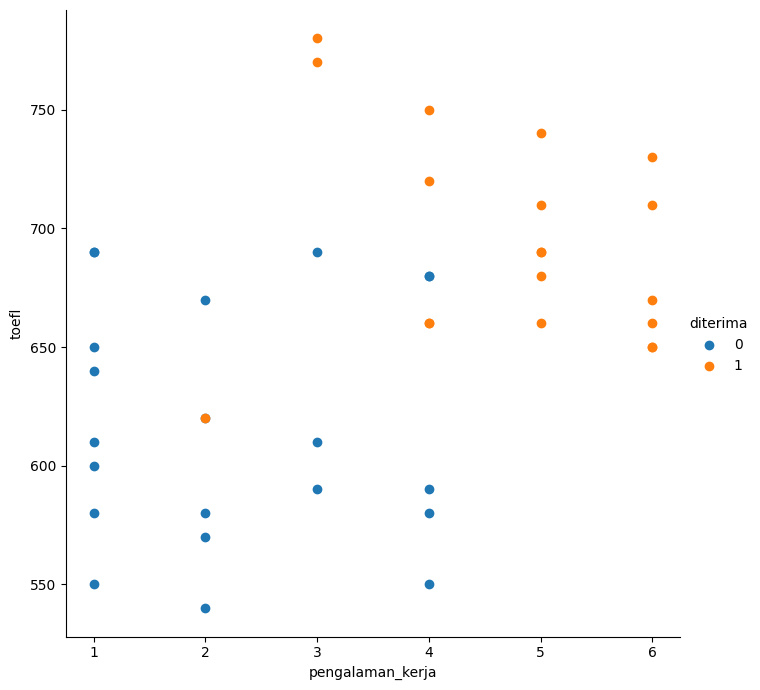

In [41]:
sns.FacetGrid(df, hue="diterima", height=7) \
   .map(plt.scatter, "pengalaman_kerja", "toefl") \
   .add_legend()

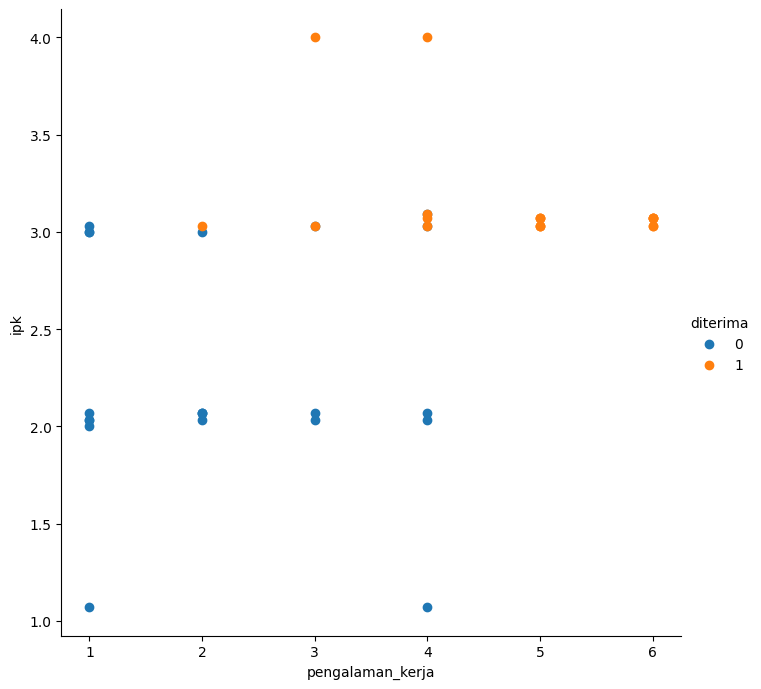

In [42]:
sns.FacetGrid(df, hue="diterima", height=7) \
   .map(plt.scatter, "pengalaman_kerja", "ipk") \
   .add_legend()

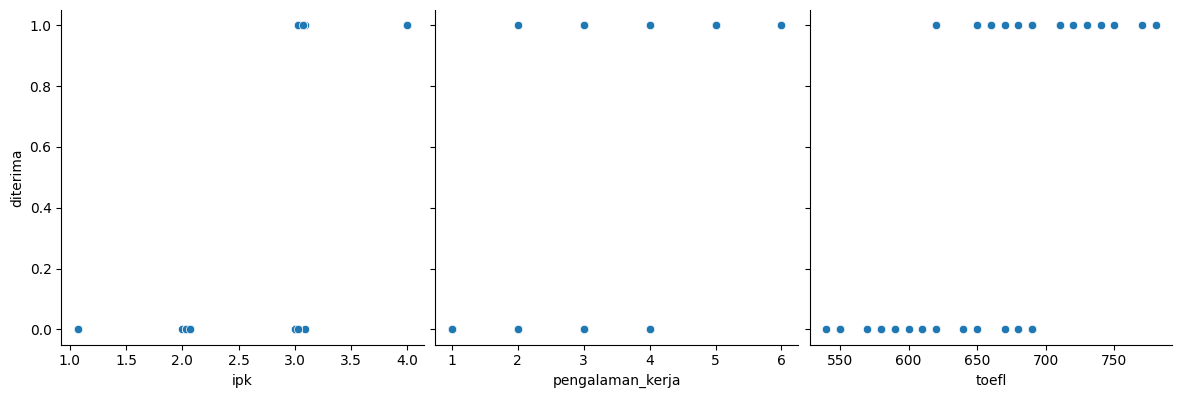

In [43]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=[ 'ipk','pengalaman_kerja','toefl'], 
             y_vars='diterima', height=4, aspect=1, kind='scatter')
plt.show()

Accuracy:  0.8333333333333334


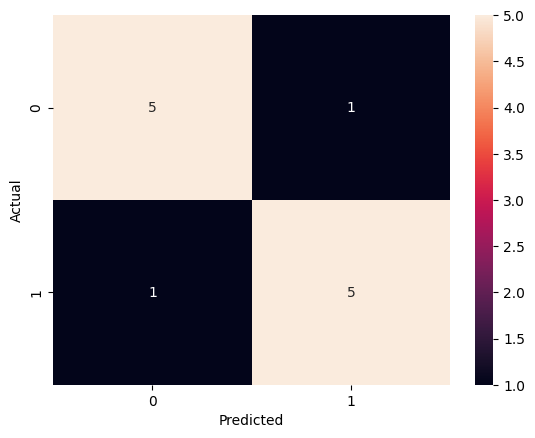

In [44]:
X = df[['toefl', 'ipk','pengalaman_kerja']]
y = df['diterima']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [34]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

array([[5, 1],
       [1, 5]], dtype=int64)

In [163]:
X_train, X_test, y_train, y_test = train_test_split (X, y,test_size=0.3, random_state=100)

In [45]:
print (X_test) 
print (y_pred)

    toefl   ipk  pengalaman_kerja
22    550  2.03                 4
20    620  3.03                 2
25    670  3.03                 6
4     680  3.09                 4
10    610  2.07                 3
15    610  3.00                 1
28    650  3.07                 6
11    690  3.07                 5
18    650  3.07                 6
29    660  3.03                 5
27    580  2.03                 2
35    650  2.03                 1
[0 0 1 1 0 0 1 1 1 1 0 0]


In [186]:
print(tabulate(X_train.head(14),  headers='keys', tablefmt='fancy_grid'))

╒════╤═════════╤═══════╤════════════════════╕
│    │   toefl │   ipk │   pengalaman_kerja │
╞════╪═════════╪═══════╪════════════════════╡
│ 22 │     550 │  2.03 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│ 18 │     650 │  3.07 │                  6 │
├────┼─────────┼───────┼────────────────────┤
│ 37 │     580 │  3.03 │                  1 │
├────┼─────────┼───────┼────────────────────┤
│  5 │     730 │  3.07 │                  6 │
├────┼─────────┼───────┼────────────────────┤
│ 13 │     680 │  3.03 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│  1 │     750 │  3.09 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│ 26 │     660 │  3.07 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│ 12 │     710 │  3.07 │                  6 │
├────┼─────────┼───────┼────────────────────┤
│ 29 │     660 │  3.03 │                  5 │
├────┼─────────┼───────┼────────────────────┤
│  9 │     690 │  1.07 │          

In [49]:
candidate = {'toefl': [590,740,680,610,710],
              'ipk': [2,3.07,3.03,2.03,3],
              'pengalaman_kerja': [3,4,6,1,5]
              }
df = pd.DataFrame(candidate,columns= ['toefl', 'ipk','pengalaman_kerja',])
y_pred=logistic_regression.predict(df)
print(tabulate(df.head(14),  headers='keys', tablefmt='fancy_grid'))
print (y_pred)

╒════╤═════════╤═══════╤════════════════════╕
│    │   toefl │   ipk │   pengalaman_kerja │
╞════╪═════════╪═══════╪════════════════════╡
│  0 │     590 │  2    │                  3 │
├────┼─────────┼───────┼────────────────────┤
│  1 │     740 │  3.07 │                  4 │
├────┼─────────┼───────┼────────────────────┤
│  2 │     680 │  3.03 │                  6 │
├────┼─────────┼───────┼────────────────────┤
│  3 │     610 │  2.03 │                  1 │
├────┼─────────┼───────┼────────────────────┤
│  4 │     710 │  3    │                  5 │
╘════╧═════════╧═══════╧════════════════════╛
[0 1 1 0 1]
